# Image Segmentation - Part 6: Dual-channel Thresholding

In Part 1, we used a threshold or a threshold range to segment grayscale values into foreground and background. These methods work on a one-dimentional vector of values. In this section, we instead set a threshold on a two-dimensional plane formed by two vectors of grayscale values representing different components of color spaces.

In [ ]:
import os

# Detect notebook environment
def detect_notebook_environment():
    if 'COLAB_GPU' in os.environ:
        print('Google Colaboratory detected.')
        %pip install "altair>=5" ipympl plantcv
        
        # Give access and mount your Google Drive (need a Google Account)
        from google.colab import drive
        drive.mount('/content/gdrive')
        
        # Enable widget feature with matplotlib
        from google.colab import output
        output.enable_custom_widget_manager()
        
        #View working directory, may need to change
        %pwd
    else:
        print('Binder detected.')

environment = detect_notebook_environment()

In [1]:
%matplotlib widget
import matplotlib
from plantcv import plantcv as pcv

In [2]:
# Global settings
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

In [3]:
pcv.__version__

'3.14.3+2146.g8838fe49'

## 01. Preparing the image for thresholding

The goal of this section is to read in the color image, identify a grayscale component of the image that maximizes the gray value difference between the plants and the background.

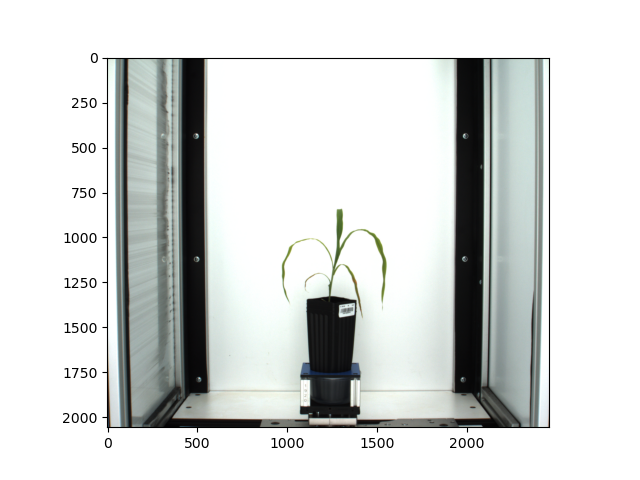

In [4]:
# Open image file
color_img, imgpath, imgname = pcv.readimage(filename="./images/VIS_SV_0_z1_h1_g0_e65_v500_190106_0.png")

`pcv.visualize.colorspaces` is a visualization tool that converts the color (RGB) image into the Hue, Saturation, and Value (HSV) and CIELAB (L = lightness, A = green-magenta, B = blue-yellow) colorspaces and displays the individual channels as grayscale images. We are aiming to identify the grayscale image that maximizes the gray value difference between the plants and the background.

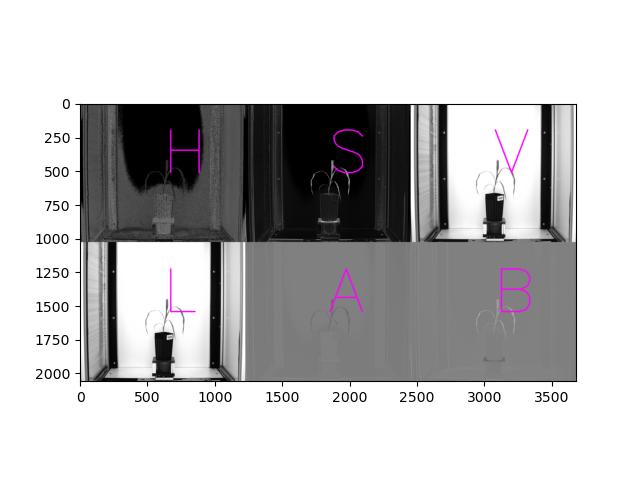

In [5]:
# Visualize component HSV and LAB color spaces
cs = pcv.visualize.colorspaces(rgb_img=color_img, original_img=False)

The "A" channel of LAB is a good choice, the plant are dark and the background is light

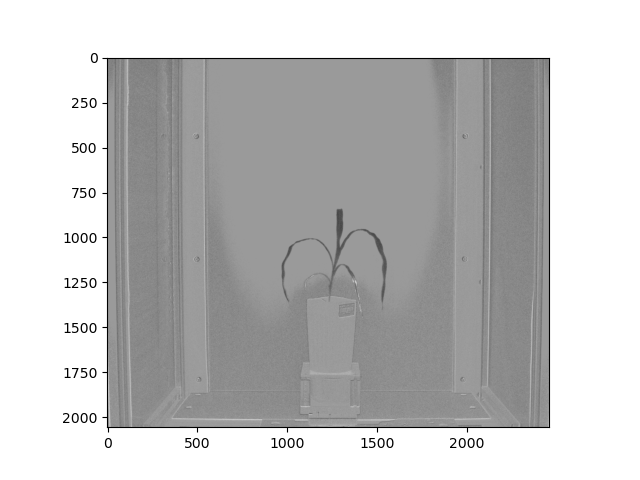

In [6]:
# Convert the RGB image into a grayscale image by choosing one of the HSV or LAB channels
grayscale_img = pcv.rgb2gray_lab(rgb_img=color_img, channel="a")

## Set a binary threshold for comparison

We covered binary threshold in the first module, but do it again here for comparison. Plant pixels are segmented well using the binary threshold but a lot of background is also included.

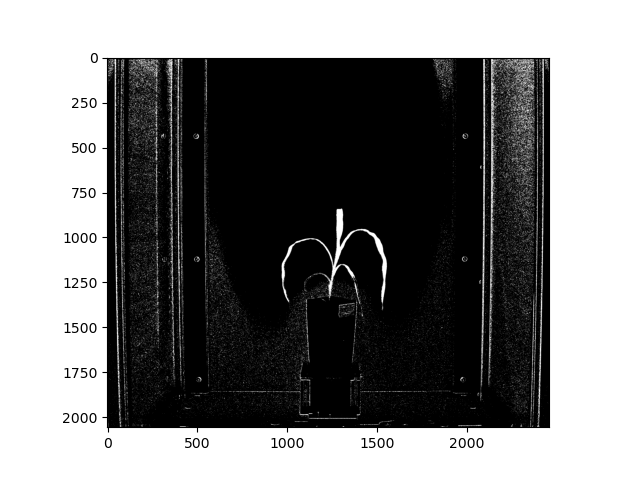

In [7]:
# Set a binary threshold where the plant pixels will be labeled white and the background will be labeled black
bin_mask = pcv.threshold.binary(gray_img=grayscale_img, threshold=120, object_type="dark")

## Set a dual-channel threshold

The "A" channel of LAB does a good job differentiating the plant and background, but other channels are also fairly effective and have advantages and disadvantages. Using two channels, we can potentially separate plant pixels in a two-dimentional view from background pixels. `pcv.visualize.pixel_scatter_plot` plots each pixel from one or more images using two input color channels (in this example the "A" of LAB and the "S" of HSV).

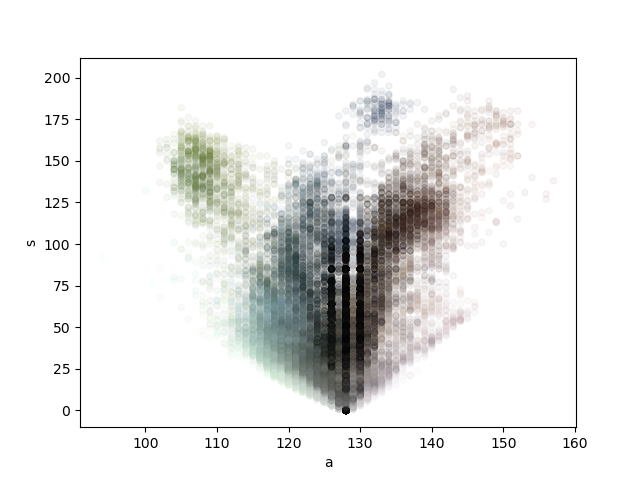

In [8]:
# Plot the image color values on a scatterplot of channel 1 vs channel 2 grayscale values
fig, ax = pcv.visualize.pixel_scatter_plot(paths_to_imgs=["images/VIS_SV_0_z1_h1_g0_e65_v500_190106_0.png"],
                                           x_channel="a", y_channel="s")

The color values on the plot above are the RGB values of the source image. We can see the green plant pixels in the upper left corner of the scatterplot. We can segment those pixels from the background pixels by defining a diagonal line. To do this we identify a start and end point for the line so that `pcv.threshold.dual_channels` can define the slope and intercept for the threshold line. Use our mouse to identify the two points on the figure above with the tool-tip that shows up below the figure.

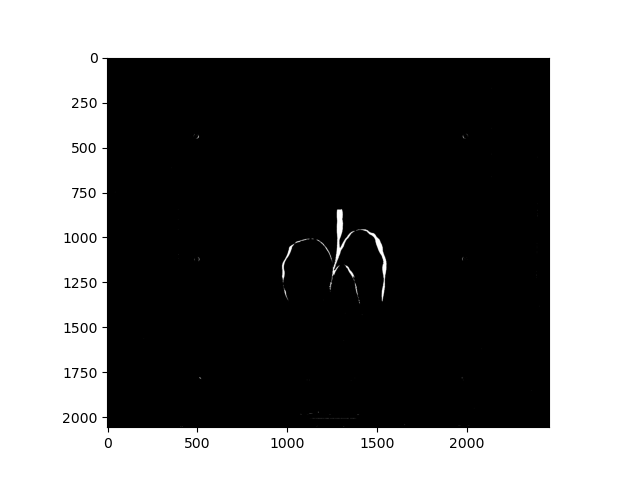

In [9]:
# Use the visualization figure to identify a start and end point that are used to define
# a line that segments the scatterplot into foreground and background
mask = pcv.threshold.dual_channels(rgb_img=color_img, x_channel="a", y_channel="s",
                                   points=[(105, 55), (121, 165)], above=True)

Unlike the binary threshold above, the dual-channel threshold is more specific at labeling plant pixels versus background.